In this Notebook, we will display the portfolio performances in comparison for DRL approaches for the Hybrid-Transformer, EIIE and the benchmarks such as Markowitz's Mean Variance Optimization and the Index itself

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import quantstats as qs

In [2]:
performance_dataset_djia = pd.read_csv("data/processed/performances_djia.csv", index_col=0)
performance_dataset_djia.index = pd.to_datetime(performance_dataset_djia.index)

In [3]:
performance_dataset_djia.tail()

,DJIA,MV,DRL_EIIE,DRL_HYBRID_TRANSFORMER
Date,,,,
2023-08-01,1.414566,1.290651,3.677373,3.880305
2023-09-01,1.379590,1.221798,3.564433,3.762234
2023-10-01,1.366022,1.176133,3.336170,3.531143
2023-11-01,1.453701,1.197034,3.439188,3.644461
2023-12-01,1.502062,1.277676,3.866388,4.106202


In [4]:
performance_dataset_djia_plot = performance_dataset_djia.apply(lambda x: (x-1)*100, axis=1)

## 1. Portfolio Performance of DRL for the DJIA Index

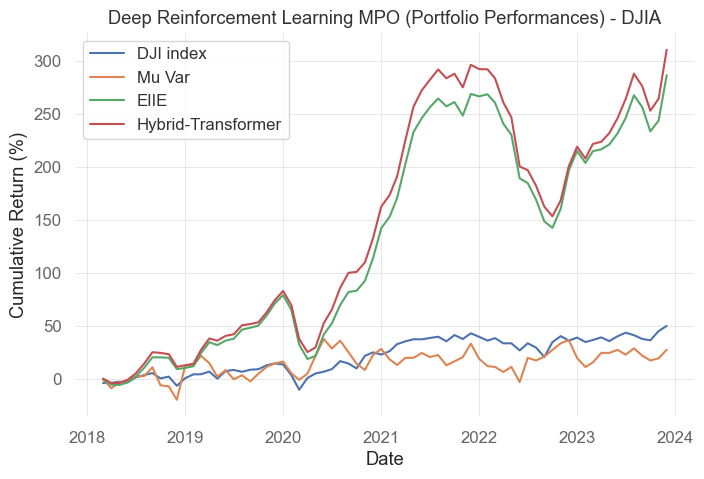

In [5]:
plt.figure(figsize=(8,5))
plt.plot(performance_dataset_djia_plot.DJIA, label='DJI index')
plt.plot(performance_dataset_djia_plot.MV, label='Mu Var')
plt.plot(performance_dataset_djia_plot.DRL_EIIE, label='EIIE')
plt.plot(performance_dataset_djia_plot.DRL_HYBRID_TRANSFORMER, label='Hybrid-Transformer')
plt.legend()
plt.title("Deep Reinforcement Learning MPO (Portfolio Performances) - DJIA")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.savefig("results/portfolio_performances/djia_performances.png")
plt.show()

## 2. Metrics for DJIA Performances

In [6]:
def fapv(x):
    return x.iloc[-1]/x.iloc[0]

In [7]:
# 1. final Accumulated Portfolio Value
fapv_djia = performance_dataset_djia.apply(lambda x: fapv(x), axis=0)
# 2. Sharpe Ratio:
sr_djia = performance_dataset_djia.apply(lambda x: qs.stats.sharpe(x, periods=12, annualize=True), axis=0)
# 3. Maximum DrawDown:
mdd_djia = performance_dataset_djia.apply(lambda x: qs.stats.max_drawdown(x), axis=0)

Dow Jones Industrial Average Metrics

In [8]:
metrics_df_djia = pd.concat([fapv_djia, sr_djia, mdd_djia], axis=1)
metrics_df_djia.columns = ["fAPV", "SR", "MDD"]
metrics_df_djia = metrics_df_djia.T
metrics_df_djia

,DJIA,MV,DRL_EIIE,DRL_HYBRID_TRANSFORMER
fAPV,1.559775,1.277676,3.885800,4.084288
SR,0.567364,0.279325,1.141641,1.181615
MDD,-0.216025,-0.294017,-0.342277,-0.360279


In [9]:
performance_dataset_cac40 = pd.read_csv("data/processed/performances_cac40.csv", index_col=0)
performance_dataset_cac40.index = pd.to_datetime(performance_dataset_cac40.index)

In [10]:
performance_dataset_cac40_plot = performance_dataset_cac40.apply(lambda x: (x-1)*100, axis=1)

## 3. Portfolio Performance of DRL for the CAC-40 Index

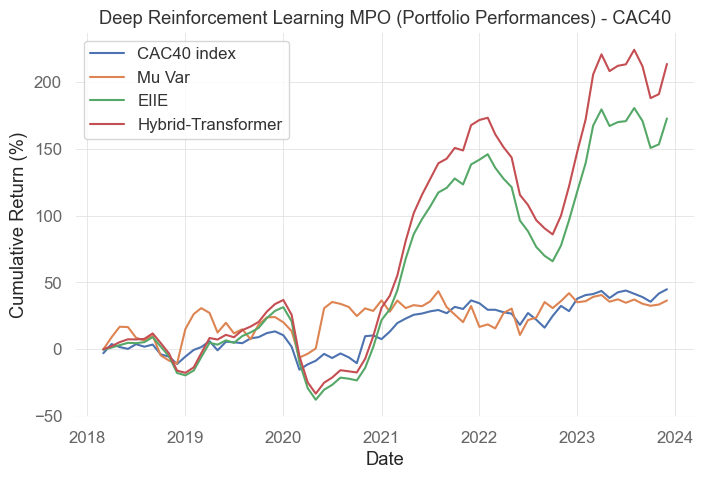

In [11]:
plt.figure(figsize=(8,5))
plt.plot(performance_dataset_cac40_plot.CAC40, label='CAC40 index')
plt.plot(performance_dataset_cac40_plot.MV, label='Mu Var')
plt.plot(performance_dataset_cac40_plot.DRL_EIIE, label='EIIE')
plt.plot(performance_dataset_cac40_plot.DRL_HYBRID_TRANSFORMER, label='Hybrid-Transformer')
plt.legend()
plt.title("Deep Reinforcement Learning MPO (Portfolio Performances) - CAC40")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.savefig("results/portfolio_performances/cac40_performances.png")
plt.show()

## 4. Metrics for CAC40 Performances

In [12]:
# 1. final Accumulated Portfolio Value
fapv_cac40 = performance_dataset_cac40.apply(lambda x: fapv(x), axis=0)
# 2. Sharpe Ratio:
sr_cac40 = performance_dataset_cac40.apply(lambda x: qs.stats.sharpe(x, periods=12, annualize=True), axis=0)
# 3. Maximum DrawDown:
mdd_cac40 = performance_dataset_cac40.apply(lambda x: qs.stats.max_drawdown(x), axis=0)

CAC 40 Index Metrics

In [13]:
metrics_df_cac40 = pd.concat([fapv_cac40, sr_cac40, mdd_cac40], axis=1)
metrics_df_cac40.columns = ["fAPV", "SR", "MDD"]
metrics_df_cac40 = metrics_df_cac40.T
metrics_df_cac40

,CAC40,MV,DRL_HYBRID_TRANSFORMER,DRL_EIIE
fAPV,1.492397,1.365279,3.131037,2.732473
SR,0.475353,0.325570,0.846357,0.760835
MDD,-0.252401,-0.282496,-0.511276,-0.526076
